In [1]:
#import packages & libraries
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests

In [2]:
def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.fromtimestamp(d) for d in df.time]
    return df

In [3]:
df = daily_price_historical('BTC','USD')

df.head(10)

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timestamp
0,1279324800,0.04951,0.04951,0.04951,20.00,0.9902,0.04951,direct,,2010-07-17
1,1279411200,0.08585,0.05941,0.04951,75.01,5.0920,0.08584,direct,,2010-07-18
2,1279497600,0.09307,0.07723,0.08584,574.00,49.6600,0.08080,direct,,2010-07-19
3,1279584000,0.08181,0.07426,0.08080,262.00,20.5900,0.07474,direct,,2010-07-20
4,1279670400,0.07921,0.06634,0.07474,575.00,42.2600,0.07921,direct,,2010-07-21
5,1279756800,0.08181,0.05050,0.07921,2160.00,129.7800,0.05050,direct,,2010-07-22
6,1279843200,0.06767,0.05050,0.05050,2402.50,141.0700,0.06262,direct,,2010-07-23
7,1279929600,0.06161,0.05049,0.06262,496.32,26.7300,0.05454,direct,,2010-07-24
8,1280016000,0.05941,0.05050,0.05454,1551.48,85.0600,0.05050,direct,,2010-07-25
9,1280102400,0.05600,0.05000,0.05050,877.00,46.9100,0.05600,direct,,2010-07-26


In [4]:
df.tail(10)

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timestamp
4607,1677369600,23673.78,23068.21,23167.45,27038.81,6.314675e+08,23557.39,direct,,2023-02-26
4608,1677456000,23876.65,23144.28,23557.39,44498.06,1.044207e+09,23490.07,direct,,2023-02-27
4609,1677542400,23596.23,23039.39,23490.07,34848.42,8.140387e+08,23134.20,direct,,2023-02-28
4610,1677628800,23962.77,23037.24,23134.20,45286.75,1.069269e+09,23641.20,direct,,2023-03-01
4611,1677715200,23788.72,23212.33,23641.20,34699.93,8.128111e+08,23467.22,direct,,2023-03-02
4612,1677801600,23476.96,22147.42,23467.22,59219.77,1.327278e+09,22361.45,direct,,2023-03-03
4613,1677888000,22410.72,22179.49,22361.45,11820.44,2.639006e+08,22351.08,direct,,2023-03-04
4614,1677974400,22632.51,22240.41,22351.08,20845.84,4.677936e+08,22433.65,direct,,2023-03-05
4615,1678060800,22596.13,22304.69,22433.65,27062.82,6.069781e+08,22410.34,direct,,2023-03-06
4616,1678147200,22540.33,22358.89,22410.34,6101.78,1.369515e+08,22391.83,direct,,2023-03-07


In [5]:
limit = datetime(2020,12,31)
start = datetime(2017,1,1)
df_train = df[(df['timestamp'] <= limit )]
df_train = df_train[(df_train['timestamp'] >= start)]

days = [val for val in df_train['timestamp'] ]
prices = [val for val in df_train['close'] ]
dict = {'Date': days, 'Close': prices}

In [6]:
df_train = pd.DataFrame(dict) 
filename = 'train_prices.csv'
df_train.to_csv(filename, index=False) 

print(f"{filename} created successfully.")

train_prices.csv created successfully.


In [7]:
#rename columns
prophet_df = df_train.rename(columns={'Date':'ds',
                                'Close':'y'})

#check
prophet_df.columns

Index(['ds', 'y'], dtype='object')

In [8]:
#initialize
model = Prophet()

#fit
model.fit(prophet_df)

10:47:33 - cmdstanpy - INFO - Chain [1] start processing
10:47:33 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
#forecast for the next 30 days
future = model.make_future_dataframe(periods=365)

#predict
forecast = model.predict(future)
     

#check out forecast
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,-1727.169345,394.934673,3416.748752,-1727.169345,-1727.169345,3572.160784,3572.160784,3572.160784,-20.866038,-20.866038,-20.866038,3593.026822,3593.026822,3593.026822,0.0,0.0,0.0,1844.991439
1,2017-01-02,-1696.223052,210.433986,3375.646503,-1696.223052,-1696.223052,3531.784070,3531.784070,3531.784070,15.226532,15.226532,15.226532,3516.557538,3516.557538,3516.557538,0.0,0.0,0.0,1835.561018
2,2017-01-03,-1665.276758,259.057403,3403.382617,-1665.276758,-1665.276758,3435.267793,3435.267793,3435.267793,-0.819703,-0.819703,-0.819703,3436.087496,3436.087496,3436.087496,0.0,0.0,0.0,1769.991035
3,2017-01-04,-1634.330465,103.363251,3206.444233,-1634.330465,-1634.330465,3371.138059,3371.138059,3371.138059,18.509139,18.509139,18.509139,3352.628920,3352.628920,3352.628920,0.0,0.0,0.0,1736.807595
4,2017-01-05,-1603.384171,10.678701,3227.389588,-1603.384171,-1603.384171,3264.452082,3264.452082,3264.452082,-2.682283,-2.682283,-2.682283,3267.134365,3267.134365,3267.134365,0.0,0.0,0.0,1661.067911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2021-12-27,30575.167614,19071.153874,48460.385954,15183.749304,43884.479326,3901.792826,3901.792826,3901.792826,15.226532,15.226532,15.226532,3886.566295,3886.566295,3886.566295,0.0,0.0,0.0,34476.960441
1822,2021-12-28,30611.355599,18691.746506,48560.308863,15126.962572,43986.260823,3847.759762,3847.759762,3847.759762,-0.819703,-0.819703,-0.819703,3848.579465,3848.579465,3848.579465,0.0,0.0,0.0,34459.115361
1823,2021-12-29,30647.543584,18517.919010,48537.755510,15093.261587,44088.042320,3819.546800,3819.546800,3819.546800,18.509139,18.509139,18.509139,3801.037661,3801.037661,3801.037661,0.0,0.0,0.0,34467.090384
1824,2021-12-30,30683.731570,18535.670696,47968.505245,15059.560602,44189.823817,3742.268935,3742.268935,3742.268935,-2.682283,-2.682283,-2.682283,3744.951219,3744.951219,3744.951219,0.0,0.0,0.0,34426.000505


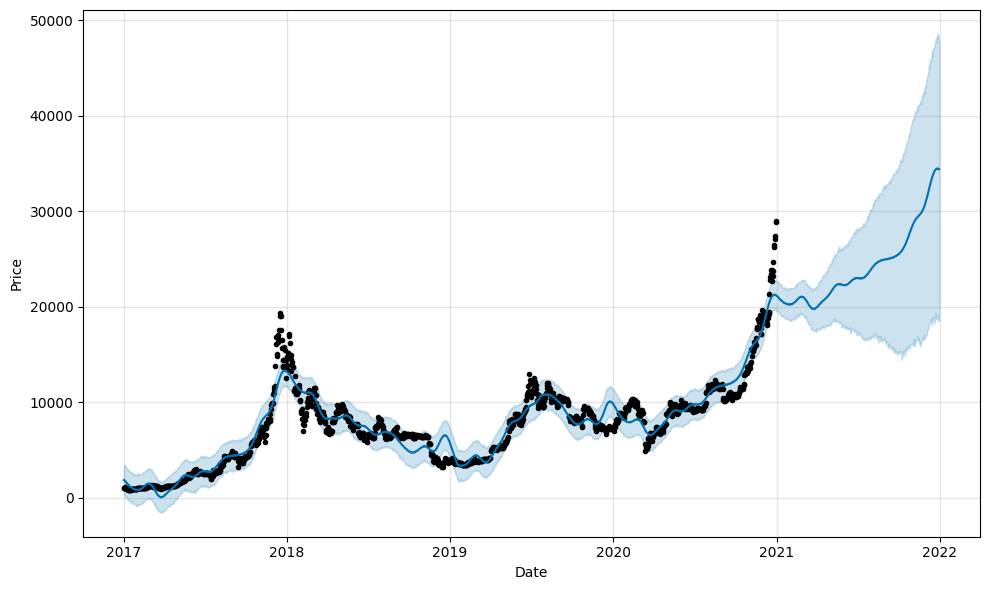

In [10]:
#visualize with Facebook internal tool
figure_1 = model.plot(forecast,
                    xlabel='Date',
                    ylabel='Price')

In [11]:
data = prophet_df[['ds','y']]
print(data)
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

             ds         y
0    2017-01-01    995.44
1    2017-01-02   1017.05
2    2017-01-03   1033.30
3    2017-01-04   1135.41
4    2017-01-05    989.35
...         ...       ...
1456 2020-12-27  26249.27
1457 2020-12-28  27039.45
1458 2020-12-29  27360.78
1459 2020-12-30  28889.61
1460 2020-12-31  28972.40

[1461 rows x 2 columns]


,ds,y
0,2017-01-01,995.44
1,2017-01-02,1017.05
2,2017-01-03,1033.30
3,2017-01-04,1135.41
4,2017-01-05,989.35


In [12]:
from neuralprophet import NeuralProphet

m = NeuralProphet()
neural_model = m.fit(data, freq='D', epochs=200)
future = m.make_future_dataframe(data, periods=365)
forecast = m.predict(future)
forecast.head()

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (46) is too small than the required number for the learning rate finder (229). The results might not be optimal.


Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2021-01-01,None,21310.710938,16927.152344,4406.610840,-23.049671
1,2021-01-02,None,21337.181641,16958.519531,4371.004395,7.657112
2,2021-01-03,None,21284.308594,16989.892578,4328.868652,-34.451118
3,2021-01-04,None,21320.505859,17021.259766,4280.512695,18.733572
4,2021-01-05,None,21285.796875,17052.630859,4226.281738,6.882542


In [13]:
forecast.tail(10)

,ds,y,yhat1,trend,season_yearly,season_weekly
355,2021-12-22,None,32443.181641,28063.658203,4356.790039,22.733351
356,2021-12-23,None,32491.945312,28095.029297,4395.422852,1.494214
357,2021-12-24,None,32530.318359,28126.400391,4426.966797,-23.049671
358,2021-12-25,None,32616.685547,28157.769531,4451.259766,7.657112
359,2021-12-26,None,32622.875000,28189.140625,4468.185547,-34.451118
360,2021-12-27,None,32716.919922,28220.513672,4477.675293,18.733572
361,2021-12-28,None,32738.468750,28251.880859,4479.704590,6.882542
362,2021-12-29,None,32780.289062,28283.253906,4474.300293,22.733351
363,2021-12-30,None,32777.652344,28314.621094,4461.536133,1.494214
364,2021-12-31,None,32764.478516,28345.992188,4441.534180,-23.049671


In [23]:
limit = datetime(2021,12,31)
start = datetime(2021,1,1)
df_real = df[(df['timestamp'] <= limit )]
df_real = df_real[(df_real['timestamp'] >= start)]

print(df_real)

            time      high       low      open  volumefrom      volumeto  \
3821  1609459200  29666.33  28748.21  28972.40    50841.73  1.487306e+09   
3822  1609545600  33257.29  29036.26  29388.94   119214.75  3.750441e+09   
3823  1609632000  34789.34  32010.59  32203.64    93510.99  3.132759e+09   
3824  1609718400  33622.70  28493.29  33063.48   124909.68  3.901979e+09   
3825  1609804800  34487.44  29985.29  32030.55    93735.47  3.037657e+09   
...          ...       ...       ...       ...         ...           ...   
4181  1640563200  52079.46  50481.26  50790.88    21873.37  1.120188e+09   
4182  1640649600  50718.53  47317.78  50714.73    40699.40  1.985905e+09   
4183  1640736000  48145.34  46107.79  47536.39    33749.80  1.599557e+09   
4184  1640822400  47917.89  45964.28  46471.70    39311.18  1.852207e+09   
4185  1640908800  48573.22  45665.44  47129.66    34737.79  1.636014e+09   

         close conversionType conversionSymbol  timestamp  
3821  29388.94         dire

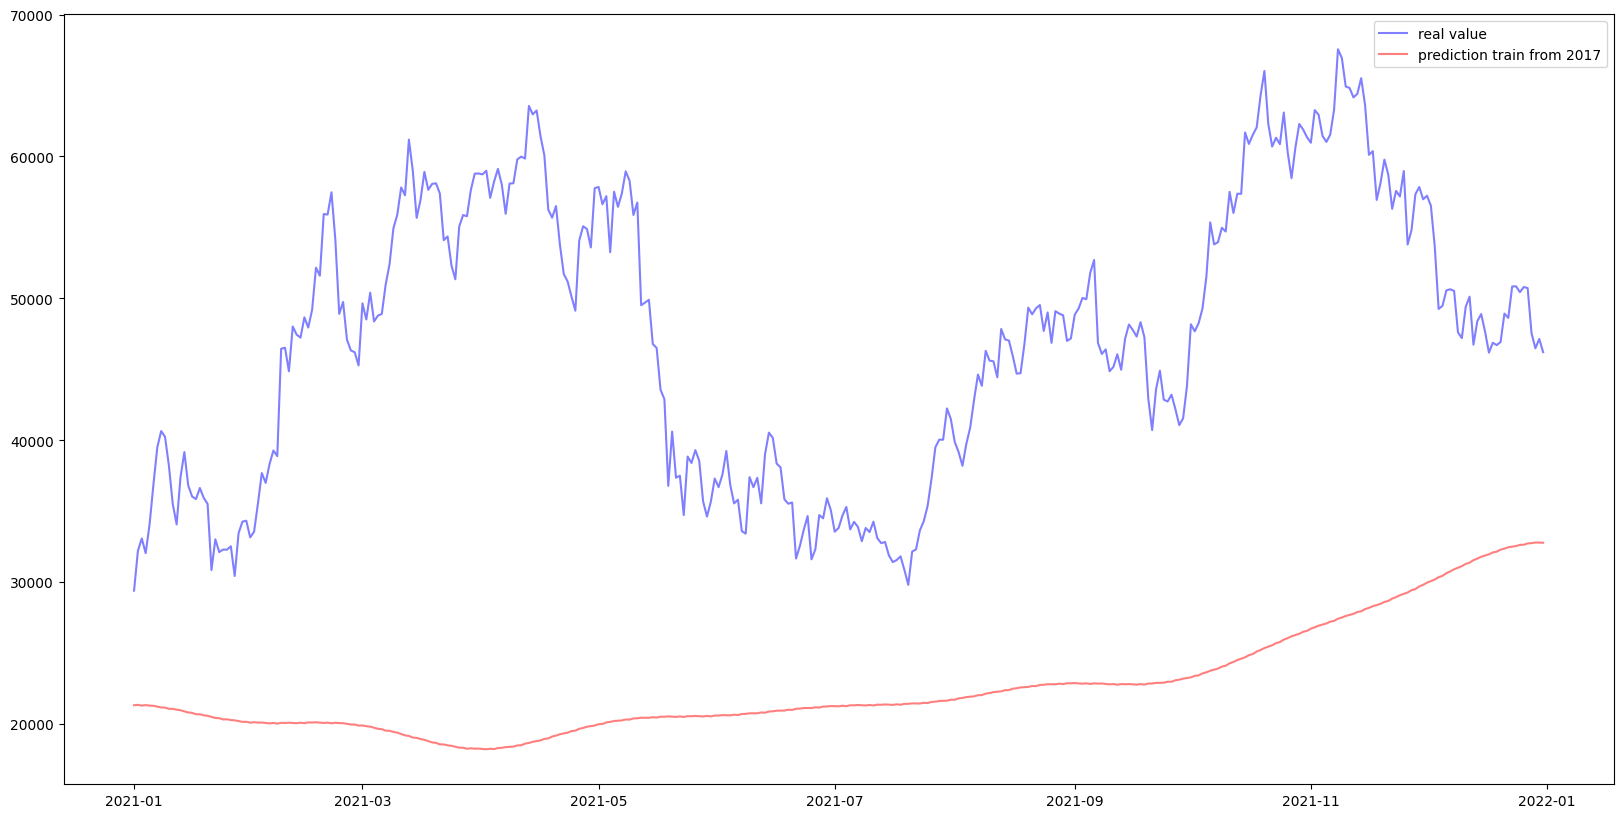

In [24]:
plt.figure(figsize=(20,10))
plt.plot(df_real['timestamp'], df_real['close'],color='blue',alpha=0.5, label="real value")
plt.plot(forecast['ds'], forecast['yhat1'],color='red',alpha=0.5, label="prediction train from 2017")

plt.legend()
plt.show()